In [ ]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Path to results

path = os.path.join(os.path.dirname(os.getcwd()), 'src\rfesults')

In [3]:
# Initialising arrays
dis= 0.1
op_array = [1, 1.01, 1.025, 1.05, 1.075, 1.1]
op_array1 = [0, 1, 2.5, 5, 7.5, 10]
ip_array =  [0, 0.25, 1]

#### Rationing

In [4]:
rat_results = pd.DataFrame(index = np.arange(len(op_array)), columns = ip_array)

for i in range(len(op_array)):
    for j in range(len(ip_array)):

            op_factor = op_array[i]
            imp_flex =  ip_array[j]

            rat = pd.read_excel(os.path.join(path, f'Rat_{op_factor}_{imp_flex}_{dis}_mosek.xlsx'), index_col = [0], header = [1])
            rat = rat.drop("Index2", axis = 'index')
            rat_sum = rat.sum().sum()/365
            rat_results.loc[i, imp_flex] = rat_sum

#### Output difference

In [5]:
out_results = pd.DataFrame(index = np.arange(len(op_array)), columns = ip_array)

for i in range(len(op_array)):
    for j in range(len(ip_array)):

            op_factor = op_array[i]
            imp_flex =  ip_array[j]

            # Output after disaster
            X = pd.read_excel(os.path.join(path, f'Xdis3_{op_factor}_{imp_flex}_{dis}_mosek.xlsx'), index_col = [0], header = [1])
            X = X.drop("Index2", axis = 'index')
            X_sum = X.sum().sum()

            # Baseline output
            Xbase = pd.read_excel(os.path.join(path, f'Xbase_{op_factor}_{imp_flex}_{dis}_mosek.xlsx'), index_col = [0], header = [1])
            Xbase = Xbase.drop("Index2", axis = 'index')
            Xbase_sum = Xbase.sum().sum()
        
            out_results.loc[i, imp_flex] = (Xbase_sum - X_sum) / 365

#### Inefficiency

In [6]:
ineff_results = pd.DataFrame(index = np.arange(len(op_array)), columns = ip_array)

for i in range(len(op_array)):
    for j in range(len(ip_array)):

            op_factor = op_array[i]
            imp_flex =  ip_array[j]

            ineff = pd.read_excel(os.path.join(path, f'ineff3_{op_factor}_{imp_flex}_{dis}_mosek.xlsx'), index_col = [0], header = [1])
            ineff = ineff.drop("Index2", axis = 'index')
            ineff = ineff.sum().sum()
            ineff_results.loc[i, imp_flex] = ineff/365

#### Efficient output

In [7]:
efficient_output = pd.DataFrame(index = np.arange(len(op_array)), columns = ip_array)

for i in range(len(op_array)):
    for j in range(len(ip_array)):

            op_factor = op_array[i]
            imp_flex =  ip_array[j]

            # Output after disaster
            X = pd.read_excel(os.path.join(path, f'Xdis3_{op_factor}_{imp_flex}_{dis}_mosek.xlsx'), index_col = [0], header = [1])
            X = X.drop("Index2", axis = 'index')
            X_sum = X.sum().sum()

            # Baseline output
            Xbase = pd.read_excel(os.path.join(path, f'Xbase_{op_factor}_{imp_flex}_{dis}_mosek.xlsx'), index_col = [0], header = [1])
            Xbase = Xbase.drop("Index2", axis = 'index')
            Xbase_sum = Xbase.sum().sum()

            ineff = pd.read_excel(os.path.join(path, f'ineff3_{op_factor}_{imp_flex}_{dis}_mosek.xlsx'), index_col = [0], header = [1])
            ineff = ineff.drop("Index2", axis = 'index')
            ineff = ineff.sum().sum()

            efficient_output.loc[i, imp_flex] = (X_sum - ineff) / 365

#### Disaster trade sum

In [9]:
impsum = pd.DataFrame(index = np.arange(len(op_array)), columns = ip_array)

for i in range(len(op_array)):
    for j in range(len(ip_array)):

        op_factor = op_array[i]
        imp_flex =  ip_array[j]
        
        dimp = pd.read_excel(os.path.join(path, f'Dimp3_{op_factor}_{imp_flex}_{dis}_mosek.xlsx'), index_col = [0,1,2], header = [0])
        impsum.loc[i, imp_flex] = dimp.sum().sum()/365

#### Cost

In [ ]:
cost3 = pd.DataFrame(index = np.arange(len(op_array)), columns = ip_array)

for i in range(len(op_array)):
    for j in range(len(ip_array)):

            op_factor = op_array[i]
            imp_flex =  ip_array[j]

            # Equiavalent production impact of rationing

            X = pd.read_excel(os.path.join(path, f'Xdis5_{op_factor}_{imp_flex}_{dis}_mosek.xlsx'), index_col = [0], header = [1])
            X = X.drop("Index2", axis = 'index')
            X_sum = X.sum().sum()

            c1 =  X_sum

            # Actual inefficiency
            ineff1 = pd.read_excel(os.path.join(path, f'ineff3_{op_factor}_{imp_flex}_{dis}_mosek.xlsx'), index_col = [0], header = [1])
            ineff1 = ineff1.drop("Index2", axis = 'index')
            ineff1 = ineff1.sum().sum()
            
            c2 = ineff1

            # Output loss - ration loss
            # Baseline output
            Xbase = pd.read_excel(os.path.join(path, f'Xbase_{op_factor}_{imp_flex}_{dis}_mosek.xlsx'), index_col = [0], header = [1])
            Xbase = Xbase.drop("Index2", axis = 'index')
            Xbase_sum = Xbase.sum().sum()

            X1 = pd.read_excel(os.path.join(path, f'Xdis3_{op_factor}_{imp_flex}_{dis}_mosek.xlsx'), index_col = [0], header = [1])
            X1 = X1.drop("Index2", axis = 'index')
            X1_sum = X1.sum().sum()

            rat = pd.read_excel(os.path.join(path, f'Rat_{op_factor}_{imp_flex}_{dis}_mosek.xlsx'), index_col = [0], header = [1])
            rat = rat.drop("Index2", axis = 'index')
            rat_sum = rat.sum().sum()

            c3 = (Xbase_sum - X1_sum) - rat_sum
        
            cost3.loc[i, imp_flex] =  (c1+c2+c3)/365

#### Multi panel figrue

<>:61: SyntaxWarning: invalid escape sequence '\D'
<>:61: SyntaxWarning: invalid escape sequence '\D'
C:\Users\sva100\AppData\Local\Temp\ipykernel_30468\2321882044.py:61: SyntaxWarning: invalid escape sequence '\D'
  ax2.set_ylabel('$\Delta$ Output\n (in million € per day)', fontsize=size_font, fontname=font)


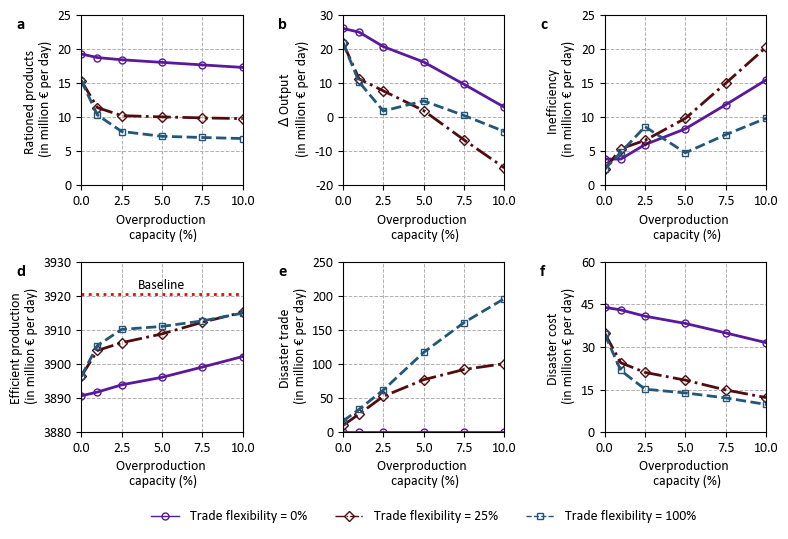

In [12]:
# Fontname and size
font = 'Calibri'
size_font = 10

# Color codes
c11 = '#5a189a'
c21 = '#540b0e'
c31 = '#22577a'

# lINE WEIGHT
lt = 2
label_x = ["0", "1",'2.5', '5', '7.5', "10"]

label_posx = -0.4
label_posy = 0.98

fig = plt.figure(figsize=(8, 5.5))
gs = fig.add_gridspec(3, 3, height_ratios=[1, 1, 0.1])  


axes = [fig.add_subplot(gs[0, 0]), fig.add_subplot(gs[0, 1]), fig.add_subplot(gs[0, 2]),
        fig.add_subplot(gs[1, 0]), fig.add_subplot(gs[1, 1]), fig.add_subplot(gs[1, 2])]


ax1, ax2, ax3, ax4, ax5, ax6 = axes


ax1.plot(op_array1, rat_results[ip_array[0]], markersize =5, c = c11, linewidth = lt, marker = 'o', markerfacecolor= 'None', linestyle='-' )
ax1.plot(op_array1, rat_results[ip_array[1]], markersize =5, c = c21, linewidth = lt, marker = 'D', markerfacecolor= 'None', linestyle='-.')
ax1.plot(op_array1, rat_results[ip_array[2]], markersize =5, c = c31, linewidth = lt, marker = 's', markerfacecolor= 'None', linestyle='--')

ax1.set_xlim([0,10])
ax1.set_ylim([0,25])
ax1.set_xticks([0, 2.5, 5, 7.5, 10])
ax1.set_yticks(np.arange(0, 30,5))
ax1.set_xticklabels(ax1.get_xticks(), fontsize=size_font, fontname=font)
ax1.set_yticklabels(ax1.get_yticks(), fontsize=size_font, fontname=font)

ax1.grid(True, which='both', linestyle='--', linewidth=0.7)
ax1.set_xlabel('Overproduction \n capacity (%)', fontsize=size_font, fontname=font)
ax1.set_ylabel('Rationed products \n (in million € per day)', fontsize=size_font, fontname=font)

ax1.text(label_posx, label_posy ,'a', transform=ax1.transAxes, fontsize=12, fontweight='bold', fontname = 'Calibri', va='top', ha='left')

# Out results


ax2.plot(op_array1, out_results[ip_array[0]], markersize =5, c = c11, linewidth = lt, marker = 'o', markerfacecolor= 'None', linestyle='-' )
ax2.plot(op_array1, out_results[ip_array[1]], markersize =5, c = c21, linewidth = lt, marker = 'D', markerfacecolor= 'None', linestyle='-.')
ax2.plot(op_array1, out_results[ip_array[2]], markersize =5, c = c31, linewidth = lt, marker = 's', markerfacecolor= 'None', linestyle='--')

ax2.set_xlim([0,10])
ax2.set_ylim([-15,30])
ax2.set_xticks([0, 2.5, 5, 7.5, 10])
ax2.set_yticks(np.arange(-20, 40,10))
ax2.set_xticklabels(ax2.get_xticks(), fontsize=size_font, fontname=font)
ax2.set_yticklabels(ax2.get_yticks(), fontsize=size_font, fontname=font)

ax2.grid(True, which='both', linestyle='--', linewidth=0.7)
ax2.set_xlabel('Overproduction \n capacity (%)', fontsize=size_font, fontname=font)
ax2.set_ylabel('$\Delta$ Output\n (in million € per day)', fontsize=size_font, fontname=font)

ax2.text(label_posx, label_posy , 'b', transform=ax2.transAxes, fontsize=12, fontweight='bold', fontname = 'Calibri', va='top', ha='left')


# Ineff results


ax3.plot(op_array1, ineff_results[ip_array[0]], markersize =5, c = c11, linewidth = lt, marker = 'o', markerfacecolor= 'None', linestyle='-' )
ax3.plot(op_array1, ineff_results[ip_array[1]], markersize =5, c = c21, linewidth = lt, marker = 'D', markerfacecolor= 'None', linestyle='-.')
ax3.plot(op_array1, ineff_results[ip_array[2]], markersize =5, c = c31, linewidth = lt, marker = 's', markerfacecolor= 'None', linestyle='--')

ax3.set_xlim([0,10])
ax3.set_ylim([0,25])
ax3.set_xticks([0, 2.5, 5, 7.5, 10])
ax3.set_yticks(np.arange(0,30,5))
ax3.set_xticklabels(ax3.get_xticks(), fontsize=size_font, fontname=font)
ax3.set_yticklabels(ax3.get_yticks(), fontsize=size_font, fontname=font)

ax3.grid(True, which='both', linestyle='--', linewidth=0.7)
ax3.set_xlabel('Overproduction \n capacity (%)', fontsize=size_font, fontname=font)
ax3.set_ylabel('Inefficiency \n (in million € per day)', fontsize=size_font, fontname=font)

ax3.text(label_posx, label_posy , 'c', transform=ax3.transAxes, fontsize=12, fontweight='bold', fontname = 'Calibri', va='top', ha='left')


# Efficient output


ax4.plot(op_array1, np.ones(len(op_array1))*xbasesum, c = 'r', linewidth = lt, linestyle=':')
ax4.plot(op_array1, efficient_output[ip_array[0]], markersize =5, c = c11, linewidth = lt, marker = 'o', markerfacecolor= 'None', linestyle='-' )
ax4.plot(op_array1, efficient_output[ip_array[1]], markersize =5, c = c21, linewidth = lt, marker = 'D', markerfacecolor= 'None', linestyle='-.')
ax4.plot(op_array1, efficient_output[ip_array[2]], markersize =5, c = c31, linewidth = lt, marker = 's', markerfacecolor= 'None', linestyle='--')

ax4.set_xlim([0,10])
ax4.set_ylim([3880,3930])
ax4.set_xticks([0, 2.5, 5, 7.5, 10])
ax4.set_yticks(np.arange(3880,3940,10))
ax4.set_xticklabels(ax4.get_xticks(), fontsize=size_font, fontname=font)
ax4.set_yticklabels(ax4.get_yticks(), fontsize=size_font, fontname=font)

ax4.grid(True, which='both', linestyle='--', linewidth=0.7)
ax4.set_xlabel('Overproduction \n capacity (%)', fontsize=size_font, fontname=font)
ax4.set_ylabel('Efficient production \n (in million € per day)', fontsize=size_font, fontname=font)

ax4.text(label_posx, label_posy , 'd', transform=ax4.transAxes, fontsize=12, fontweight='bold', fontname = 'Calibri', va='top', ha='left')
ax4.text(0.35, 0.9 , 'Baseline', transform=ax4.transAxes, fontsize=10, fontname = 'Calibri', va='top', ha='left')

# Imports

ax5.plot(op_array1, impsum[ip_array[0]], markersize =5, c = c11, linewidth = lt, marker = 'o', markerfacecolor= 'None', linestyle='-' )
ax5.plot(op_array1, impsum[ip_array[1]], markersize =5, c = c21, linewidth = lt, marker = 'D', markerfacecolor= 'None', linestyle='-.')
ax5.plot(op_array1, impsum[ip_array[2]], markersize =5, c = c31, linewidth = lt, marker = 's', markerfacecolor= 'None', linestyle='--')

ax5.set_xlim([0,10])
ax5.set_ylim([0, 250])
ax5.set_xticks([0, 2.5, 5, 7.5, 10])
ax5.set_yticks(np.arange(0, 300, 50))
ax5.set_xticklabels(ax5.get_xticks(), fontsize=size_font, fontname=font)
ax5.set_yticklabels(ax5.get_yticks(), fontsize=size_font, fontname=font)

ax5.grid(True, which='both', linestyle='--', linewidth=0.7)
ax5.set_xlabel('Overproduction \n capacity (%)', fontsize=size_font, fontname=font)
ax5.set_ylabel('Disaster trade \n (in million € per day)', fontsize=size_font, fontname=font)

ax5.text(label_posx, label_posy , 'e', transform=ax5.transAxes, fontsize=12, fontweight='bold', fontname = 'Calibri', va='top', ha='left')


# Cost

ax6.plot(op_array1, cost3[ip_array[0]], markersize =5, c = c11, linewidth = lt, marker = 'o', markerfacecolor= 'None', linestyle='-' , label = 'Trade flexibiltiy - 0%')
ax6.plot(op_array1, cost3[ip_array[1]], markersize =5, c = c21, linewidth = lt, marker = 'D', markerfacecolor= 'None', linestyle='-.', label = 'Trade flexibiltiy - 25%')
ax6.plot(op_array1, cost3[ip_array[2]], markersize =5, c = c31, linewidth = lt, marker = 's', markerfacecolor= 'None', linestyle='--', label = 'Trade flexibiltiy - 100%')

ax6.set_xlim([0,10])
ax6.set_ylim([0, 60])
ax6.set_xticks([0, 2.5, 5, 7.5, 10])
ax6.set_yticks(np.arange(0, 75, 15))
ax6.set_xticklabels(ax6.get_xticks(), fontsize=size_font, fontname=font)
ax6.set_yticklabels(ax6.get_yticks(), fontsize=size_font, fontname=font)

ax6.grid(True, which='both', linestyle='--', linewidth=0.7)
ax6.set_xlabel('Overproduction \n capacity (%)', fontsize=size_font, fontname=font)
ax6.set_ylabel('Disaster cost \n (in million € per day)', fontsize=size_font, fontname=font)

ax6.text(label_posx, label_posy , 'f', transform=ax6.transAxes, fontsize=12, fontweight='bold', fontname = 'Calibri', va='top', ha='left')


# Create the legend in the 3rd row (last row)
fig_legend = fig.add_subplot(gs[2, :])  # Span all columns
lines = [
    plt.plot([], [], markersize=5, c=c11, marker='o', markerfacecolor='none', linestyle='-', linewidth=1, label='Trade flexibility = 0%')[0],
    plt.plot([], [], markersize=5, c=c21, marker='D', markerfacecolor='none', linestyle='-.', linewidth=1, label='Trade flexibility = 25%')[0],
    plt.plot([], [], markersize=5, c=c31, marker='s', markerfacecolor='none', linestyle='--', linewidth=1, label='Trade flexibility = 100%')[0]
]

fig_legend.legend(handles=lines, loc='center', ncol=3, frameon=False, prop={'family': font, 'size': size_font})
fig_legend.axis('off')  # Hide axes for the legend


plt.subplots_adjust(hspace=0.5)
plt.tight_layout()
plt.savefig(f'sensitivity_plot.png', dpi=1200, bbox_inches='tight')
plt.show()